# Лаборатрная работа №3.2.6
## Выполнил Усеинов Булат Рустэмович
### 778  группа

In [2]:
import numpy as np
import pandas as pd
from scipy import interpolate
from matplotlib import pyplot as plt
import math

### Объявим приборные погрешности величин в эксперименте.

In [3]:
delta_x = 0.001 #погрешность отклонения зайчика
delta_u = 3. / 150 #погрешность напряжения
delta_r = 100  #погрешность сопротивления


## Часть I. Определение динамической постоянной.

In [46]:
U0 = (3. / 150) * 66
R2 = 10000
R0 = 580
a2 = 2.2
R1R2 = 1./2000
C = 2 * (10 ** (-6))

In [5]:
data1 = pd.DataFrame()
data1['R, Om'] = [4700, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
data1['x, cm'] = [23.5, 10.5, 6.3, 4.1, 2.9, 2.0, 1.4, 0.8, 0.4, 0.1]
data1['x, m'] = 0.01 * data1['x, cm']
data1['I, A'] = U0 * R1R2 * (1 / (data1['R, Om'] + R0))
data1

,"R, Om","x, cm","x, m","I, A"
0,4700,23.5,0.235,1.250000e-07
1,10000,10.5,0.105,6.238185e-08
2,15000,6.3,0.063,4.236200e-08
3,20000,4.1,0.041,3.206997e-08
4,25000,2.9,0.029,2.580141e-08
5,30000,2.0,0.020,2.158273e-08
6,35000,1.4,0.014,1.854975e-08
7,40000,0.8,0.008,1.626417e-08
8,45000,0.4,0.004,1.448004e-08
9,50000,0.1,0.001,1.304864e-08


Text(0, 0.5, 'I,A')

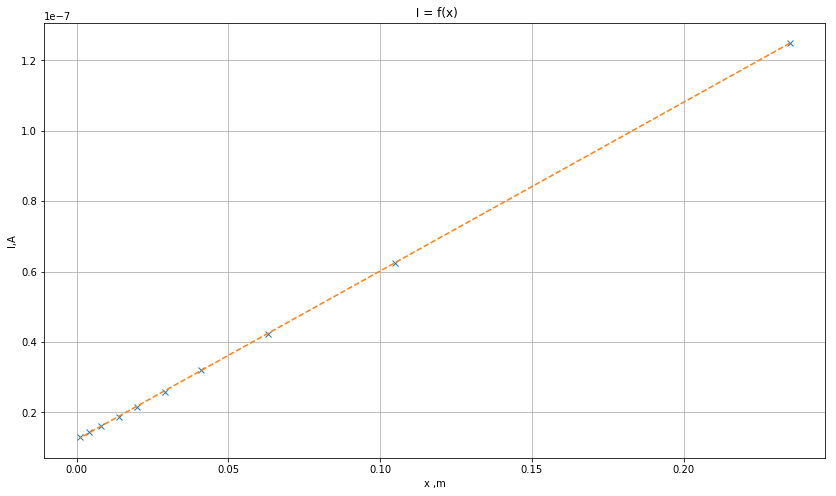

In [61]:
plt.figure(figsize=(14,8))
plt.title(r' I = f(x)')
plt.plot(data1['x, m'], data1['I, A'], 'x' )
A = np.vstack([data1['x, m'], np.ones(len(data1['x, m']))]).T
b, a = np.linalg.lstsq(A, data1['I, A'], rcond = None)[0]
plt.plot(data1['x, m'], b*data1['x, m'] + a, '--')
plt.grid()
plt.xlabel(r'x ,m')
plt.ylabel(r'I,A')


### Из формулы $C_1 = \frac{2aI}{x}$ найдем динамическую постоянную $C_1$, учтем, что $\frac{I}{x}$ есть наклон нашего графика, построенного выше

In [64]:
c1 = a2 * b
# расчет погрешностей
sum1 = 0.
sum2 = 0.

for i in range(len(data1['I, A'])):
    sum1 += (data1['I, A'][i] - b * data1['x, m'][i] - a )**2
    sum2 += (data1['x, m'][i] - np.mean(data1['x, m']))**2
   
delta_c1 = np.sqrt(sum1 / ((len(data1['I, A'])-1) * sum2))

print('c1 = ({:.4} +- {:.4}) А/(м/м)'.format(c1, delta_c1))

c1 = (1.054e-06 +- 1.266e-09) А/(м/м)


## Часть II. Определение критического сопротивления.

### Определим логарифмический декремент затухания по формуле $\Theta_0 = \ln{\frac{x_n}{x_{n+1}}}$

In [8]:
data_2 = pd.DataFrame()
data_21 = pd.DataFrame()
data_2['x, cm'] = [23.9, 21.0, 18.9, 16.8, 15.1]
a = np.zeros(4)
for i in range(data_2['x, cm'].shape[0]-1):
    a[i] = math.log(data_2['x, cm'][i]/data_2['x, cm'][i+1])
data_21['ln'] = a

In [9]:
print('theta_0 = {:.4}'.format(np.mean(data_21['ln'])))

theta_0 = 0.1148


In [10]:
k = 1./1000
data2 = pd.DataFrame()
data2['R, Om'] = [10200, 15200, 18000, 20000, 25000, 30000, 34000]
data2['x1, cm'] = [2.5, 3.4, 3.7, 3.7, 3.6, 4.0, 3.5]
data2['x2, cm'] = [0.3, 0.7, 1.0, 1.2, 1.5, 2.0, 1.7]
data2['theta'] = np.log(data2['x1, cm'] / data2['x2, cm'])
data2['1/theta^2'] = 1 / (data2['theta']**2)
data2['(R+R0)^2'] = (data2['R, Om'] + R0)**2

data2

,"R, Om","x1, cm","x2, cm",theta,1/theta^2,(R+R0)^2
0,10200,2.5,0.3,2.120264,0.222444,116208400
1,15200,3.4,0.7,1.580450,0.400349,249008400
2,18000,3.7,1.0,1.308333,0.584203,345216400
3,20000,3.7,1.2,1.126011,0.788705,423536400
4,25000,3.6,1.5,0.875469,1.304724,654336400
5,30000,4.0,2.0,0.693147,2.081369,935136400
6,34000,3.5,1.7,0.722135,1.917624,1195776400


1.5649755753904335e-09

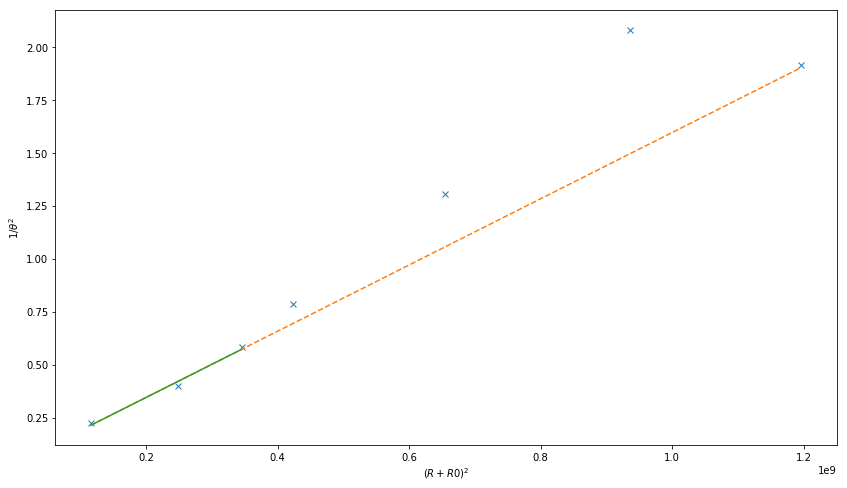

In [65]:
R = np.array(data2['(R+R0)^2'][:3])
th = np.array(data2['1/theta^2'][:3])
plt.figure(figsize=(14, 8))
plt.plot(data2['(R+R0)^2'], data2['1/theta^2'], 'x')
B = np.vstack([R, np.ones(len(R))]).T
b1, a1 = np.linalg.lstsq(B, th, rcond = None)[0]
plt.plot(data2['(R+R0)^2'], b1*data2['(R+R0)^2'] + a1, '--')
plt.plot(R, b1*R + a1, '-')
plt.xlabel(r'$(R+R0)^2$')
plt.ylabel(r'$1/\theta^2$')
b1

### Рассчитаем критическое сопротивление в стационарном режиме по формуле $R_{кр} = \frac{1}{2 \pi} \sqrt{\frac{\Delta (R_0+R)^2}{ \Delta(1 / \Theta^2)}}$

In [69]:
#рассчитаем погрешности для сопротивления
sum1 = 0.
sum2 = 0.

for i in range(2):
    sum1 += (data2['1/theta^2'][i] - b1 * data2['(R+R0)^2'][i] - a1 )**2
    sum2 += (data2['(R+R0)^2'][i] - np.mean(data2['(R+R0)^2'][:3]))**2
   
delta_Rcr = np.sqrt(sum1 / (2 * sum2))

print('Rкр = ({:.6} +- {:6}) Om'.format(1 / (b1**0.5 * 2 * np.pi) - R0, delta_Rcr ))

Rкр = (3443.15 +- 1.3332476391494352e-10) Om


## Часть II. Балистический режим

In [13]:
data_3 = pd.DataFrame()
data_3['R, Om'] = [50000, 30000, 20000, 10000, 5000, 3000, 2000, 1500, 1000]
data_3['x, cm'] = [24.2, 23.2, 21.5, 18.3, 14.5, 11.5, 9.8, 8.5, 7.5]
data_3['x, m'] = data_3['x, cm'] / 100
data_3['(R+R0)^-1'] = 1. / (data_3['R, Om'] + R0)
data_3

,"R, Om","x, cm","x, m",(R+R0)^-1
0,50000,24.2,0.242,0.000020
1,30000,23.2,0.232,0.000033
2,20000,21.5,0.215,0.000049
3,10000,18.3,0.183,0.000095
4,5000,14.5,0.145,0.000179
5,3000,11.5,0.115,0.000279
6,2000,9.8,0.098,0.000388
7,1500,8.5,0.085,0.000481
8,1000,7.5,0.075,0.000633


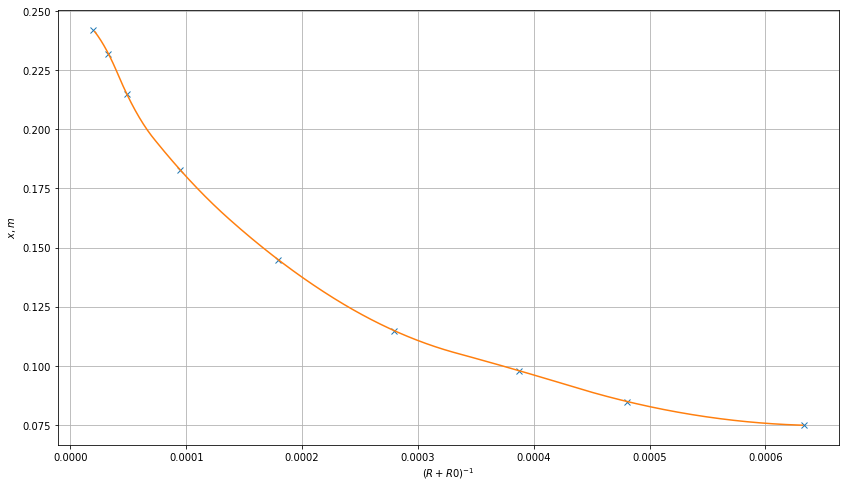

In [14]:
plt.figure(figsize=(14, 8))
plt.plot(data_3['(R+R0)^-1'], data_3['x, m'], 'x' )
x = np.linspace( 0.000021, 0.000632, 700)
f = interpolate.interp1d(data_3['(R+R0)^-1'], data_3['x, m'], kind='quadratic')
plt.plot(x , f(x), '-')
plt.grid()
plt.xlabel(r'$(R+R0)^{-1}$')
plt.ylabel(r'$x, m$');


## Определим по графику критическое сопротивление

$l_{max} = e \cdot l_{кр} \Rightarrow l_{кр} = \frac{l_{max}}{e}$ Далее по графику определяем $R_{кр}$  по  $l_{кр}$ 

In [45]:

l_max = 0.332
l_cr = 0.122
# по графику определили
r = 0.0002501 # (R_кр + R0)^-1
R_cr = (1. / r) - R0

print('Rкр = {:.6}'.format(R_cr))

Rкр = 3418.4


## Часть III. Сравним значения $R_{кр}$

In [40]:
data_sr = pd.DataFrame()
data_sr['Режим'] = ['Подбор', 'Стационарный', 'Баллистический']
data_sr['R кр'] = [3400, 3443.15, 3418.4 ]
data_sr

,Режим,R кр
0,Подбор,3400.00
1,Стационарный,3443.15
2,Баллистический,3418.40


## Часть IV.  Расчет баллистической постоянной в критическом режиме.

### Рассчитаем баллистическую постоянную по формуле: $C_{Q_{кр}} = 2a \frac{R_1}{R_2} \frac{U_0 C}{l_{кр}}$

In [50]:
c2 = a2 * (1. / 15) * ((U0*C ) / l_max)
print('c2 = ({:.4}) А/(м/м)'.format(c2))

c2 = (1.166e-06) А/(м/м)


## Часть V. Сравним время релаксации и период свободных колебаний гальванометра.

In [52]:
data_t = pd.DataFrame()
data_t['Величина'] = ['Время релаксации', 'Период свободных колебаний']
data_t['Значение'] = [R0 * C , 6.842]
data_t

,Величина,Значение
0,Время релаксации,0.00116
1,Период свободных колебаний,6.84200


### Время релаксации много меньше периода свободных колебаний гальванометра.